In [70]:
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
base = pd.read_csv('/workspaces/learning-machine-learning/udemy/a_z/bolsa_valores/petr4_treinamento.csv')

In [52]:
base = base.dropna()

In [53]:
base_treinamento = base.iloc[:, 1:2].values
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

Definir intervalo de tempo

In [54]:
previsores = []
preco_real = []
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])

previsores, preco_real = np.array(previsores), np.array(preco_real)

In [55]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [56]:
regressor = Sequential()
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(previsores.shape[1], 1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
plot_model(regressor, to_file='/workspaces/learning-machine-learning/udemy/a_z/bolsa_valores/modelo_recorrente.png', show_shapes=True, show_layer_names=True)

In [ ]:
regressor.fit(previsores, preco_real, epochs=100, batch_size=32)

In [65]:
base_teste = pd.read_csv('/workspaces/learning-machine-learning/udemy/a_z/bolsa_valores/petr4_teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values

In [66]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis=0)

In [69]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])

X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

1/1 [==============================] - 2s 2s/step


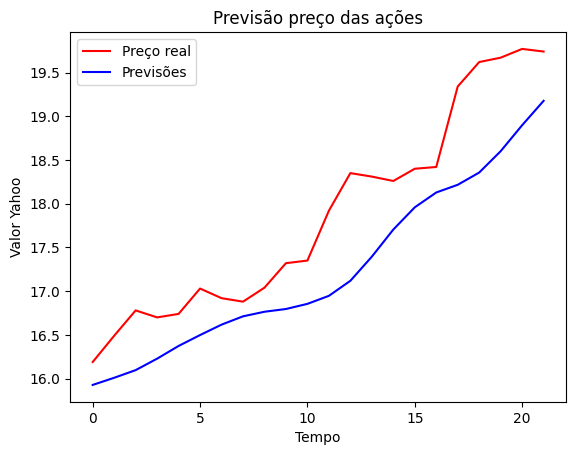

In [74]:
plt.plot(preco_real_teste, color='red', label='Preço real')
plt.plot(previsoes, color='blue', label='Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()